In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0,1";
import random
random.seed(10)
import pandas as pd
data=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification.csv')
#test=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification-test.csv')

data.head(10)

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,0,https://api.github.com/repos/eamodio/vscode-gi...,bug,2021-01-02T18:07:30Z,NONE,https://api.github.com/repos/eamodio/vscode-gi...,Welcome screen on every editor window is very ...,I just discovered Gitlens and find the functio...
1,1,https://api.github.com/repos/binwiederhier/pco...,bug,2020-12-31T18:19:31Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"""pcopy invite"" and ""pcopy paste abc:"" does not...",NaN
2,2,https://api.github.com/repos/binwiederhier/pco...,bug,2021-01-03T04:33:36Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"UI: Modal overlay is half transparent, shouldn...",NaN
3,3,https://api.github.com/repos/Sothatsit/RoyalUr...,enhancement,2020-12-25T00:46:00Z,OWNER,https://api.github.com/repos/Sothatsit/RoyalUr...,Make the loading screen scale with browser win...,Currently the loading wheel is a fixed size in...
4,4,https://api.github.com/repos/Malivil/TTT-Custo...,bug,2021-01-02T21:36:57Z,OWNER,https://api.github.com/repos/Malivil/TTT-Custo...,Spectator - Investigate a way to strip weapons...,To bring magneto stick floating
5,5,https://api.github.com/repos/jankuss/shroom/is...,enhancement,2020-12-31T13:43:33Z,NONE,https://api.github.com/repos/jankuss/shroom,Single Shroom instance for multiple canvases?,Is it possible to be able to create a single S...
6,7,https://api.github.com/repos/juniorGreg/moisi_...,bug,2020-12-27T01:40:34Z,OWNER,https://api.github.com/repos/juniorGreg/moisi_...,Correct navigation bar for some resolution,![Capture d’écran_2020-12-26_20-40-02](https:/...
7,8,https://api.github.com/repos/JoeParrinello/Bro...,enhancement,2021-01-02T16:05:43Z,OWNER,https://api.github.com/repos/JoeParrinello/Bro...,Return asset growth,Would have to cache:\r\n- Stock Ticker Request...
8,9,https://api.github.com/repos/Forty-Bot/trends....,enhancement,2021-01-03T03:46:34Z,OWNER,https://api.github.com/repos/Forty-Bot/trends.tf,Add filter for logs,Add the ability to filter logs like on other p...
9,10,https://api.github.com/repos/andrewjj20/post/i...,enhancement,2020-10-23T04:38:35Z,COLLABORATOR,https://api.github.com/repos/andrewjj20/post,Create trait for Meetup Service publisher stores,Developers could want different backing publis...


> Print the length of the dataset

In [2]:
data=data.sample(frac=0.25)
len(data)

180725

In [3]:
data=data[['issue_body', 'issue_label']]

In [4]:
data.head()

,issue_body,issue_label
448203,"On web dashboard, when you leave a space on to...",bug
185247,Is it possible to log in through the system PA...,question
634725,Feature request: Add Sticky assignor strategy ...,enhancement
83922,"Hi Guilhem, \r\n\r\nI'm not sure whether this ...",enhancement
58011,NaN,bug


> Drop nulls

In [5]:
data = data.dropna(subset=['issue_body'])

In [6]:
len(data)

162892

> Standardize the text

In [7]:
import re

def standardize_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\s+' ,'',text)
    text = text.lower()
    return text.strip()

data['issue_body'] = data['issue_body'].apply(standardize_text)

data = data.drop_duplicates(subset=['issue_body'])

In [8]:
len(data)

156403

> Remove punctuation

In [9]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['issue_body'] = data['issue_body'].apply(remove_punctuation)

In [10]:
possible_labels = data.issue_label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'bug': 0, 'question': 1, 'enhancement': 2}

In [11]:
data['issue_label'] = data.issue_label.replace(label_dict)

/tmp/ipykernel_25/3275910327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['issue_label'] = data.issue_label.replace(label_dict)


In [12]:
data.head(10)

,issue_body,issue_label
448203,on web dashboard when you leave a space on top...,0
185247,is it possible to log in through the system pa...,1
634725,feature request add sticky assignor strategy i...,2
83922,hi guilhem im not sure whether this is a bug o...,2
677937,httpspasteubuntucomp4hnzx5fgwc,0
173276,updated make a functional react component to o...,2
665999,is your feature request related to a problem p...,2
239602,please read this first if your issue relates t...,0
175851,i am using tinymce 4512 editor as email editor...,1
131760,firstly well done the app looks good i like th...,2


In [13]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# def clean_tokenization(text):
#   return word_tokenize(text)

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words=set(stopwords.words('english'))
# def clean_stopwords(token):
#    return [item for item in token if item not in stop_words]

# data['issue_body'] = data['issue_body'].apply(clean_tokenization)
# data['issue_body']=data['issue_body'].apply(clean_stopwords)


In [14]:
# import nltk
# nltk.download('punkt')

In [15]:
# import re
# import nltk
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

In [16]:
# def convert_to_string(listReview):
#   return' '.join(listReview)
# data['issue_body']=data['issue_body'].apply(convert_to_string)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

min_samples = data['issue_label'].value_counts().min()

# Resample each class to have the same number of samples (minimum number)
rus = RandomUnderSampler(sampling_strategy={class_label: min_samples for class_label in data['issue_label'].unique()})
X, y = rus.fit_resample(data.drop(columns='issue_label'), data['issue_label'])

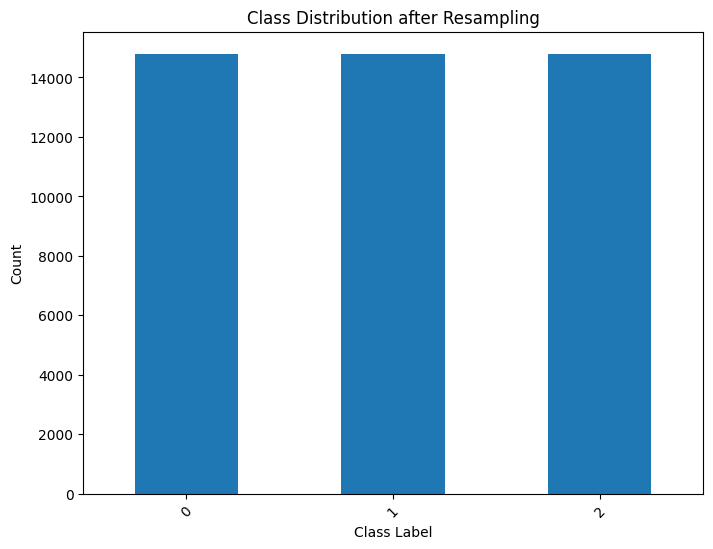

In [18]:
import matplotlib.pyplot as plt

# Get value counts of the resampled labels
label_counts = pd.Series(y).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Class Distribution after Resampling')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
len(X), len(y)

(44397, 44397)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)

(35517, 8880)

In [21]:
# for plotting comparisons
acc = []; pre = [] ; rec = [] ; f = []

In [22]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics

In [23]:
# Install ktrain
!pip install --upgrade pip -q
!pip install -q ktrain
!pip install tf-keras==2.15
!pip install transformers datasets torch tensorboard
import os 
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [24]:
# from ktrain import text

In [25]:
class_names=['enhancement', 'bug','question']
x_train = x_train['issue_body'].tolist()
y_train = y_train.to_numpy()
x_test = x_test['issue_body'].tolist()
y_test = y_test.to_numpy()


In [26]:
# (x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train,
#                                                                       y_train=y_train,
#                                                                       x_test=x_test,
#                                                                       y_test=y_test,
#                                                                       class_names=class_names,
#                                                                       preprocess_mode='bert',maxlen=80)

In [27]:
# # Step 3: Load the pre-trained BERT model
# model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)

# # Step 4: Initialize a ktrain classifier using BERT
# learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

# # Step 5: Train the classifier on your data
# learner.fit_onecycle(2e-5, 1)

# # Step 6: Evaluate the classifier on a validation set
# learner.validate(val_data=(x_test, y_test))


In [28]:
# # It may need long time but ensures healthy training
# learner.lr_find(show_plot=True, max_epochs=2)

In [29]:
# # After the learning rate find process plot the curve of leaning rate - loss to select best learning rate
# learner.lr_plot()

In [30]:
# # Fit the leraner to the data for 2 epochs
# # Many other fit options available on the documentation of ktrain https://github.com/amaiya/ktrain
# learner.autofit(2e-5, 2)
# learner.validate(val_data=(x_test, y_test))

In [31]:
#predictor = ktrain.get_predictor(learner.model)
#predictor.save('/content/drive/MyDrive/NLP/my_predictor')

In [32]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Tokenize the training data
train_encodings = tokenizer(x_train, truncation=True, padding=True)

# Tokenize the testing data
test_encodings = tokenizer(x_test, truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [33]:
import torch

# Convert labels to tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)


In [34]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset objects
train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)


In [35]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    report_to='tensorboard'
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 1.2944, 'grad_norm': 3.378084897994995, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.009009009009009009}
{'loss': 1.2864, 'grad_norm': 3.861701488494873, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.018018018018018018}
{'loss': 1.1885, 'grad_norm': 2.5903146266937256, 'learning_rate': 3e-06, 'epoch': 0.02702702702702703}
{'loss': 1.2015, 'grad_norm': 4.142561912536621, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.036036036036036036}
{'loss': 1.132, 'grad_norm': 2.469738006591797, 'learning_rate': 5e-06, 'epoch': 0.04504504504504504}
{'loss': 1.1128, 'grad_norm': 2.256406307220459, 'learning_rate': 6e-06, 'epoch': 0.05405405405405406}
{'loss': 1.0815, 'grad_norm': 1.7704821825027466, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.06306306306306306}
{'loss': 1.0725, 'grad_norm': 1.2732826471328735, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.07207207207207207}
{'loss': 1.0442, 'grad_norm': 1.487452745437622, 'learning_rate': 9e-06, 'epoch': 0.08108

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.7769, 'grad_norm': 3.6469802856445312, 'learning_rate': 4.982332155477032e-05, 'epoch': 0.4594594594594595}
{'loss': 0.8183, 'grad_norm': 3.8548641204833984, 'learning_rate': 4.9646643109540636e-05, 'epoch': 0.46846846846846846}
{'loss': 0.7684, 'grad_norm': 3.9139747619628906, 'learning_rate': 4.946996466431096e-05, 'epoch': 0.4774774774774775}
{'loss': 0.6802, 'grad_norm': 3.4709372520446777, 'learning_rate': 4.929328621908128e-05, 'epoch': 0.4864864864864865}
{'loss': 0.7887, 'grad_norm': 3.325201988220215, 'learning_rate': 4.9116607773851593e-05, 'epoch': 0.4954954954954955}
{'loss': 0.7512, 'grad_norm': 3.8727681636810303, 'learning_rate': 4.893992932862191e-05, 'epoch': 0.5045045045045045}
{'loss': 0.6923, 'grad_norm': 3.848325729370117, 'learning_rate': 4.8763250883392234e-05, 'epoch': 0.5135135135135135}
{'loss': 0.6497, 'grad_norm': 3.6758079528808594, 'learning_rate': 4.858657243816255e-05, 'epoch': 0.5225225225225225}
{'loss': 0.7225, 'grad_norm': 5.56888151168823

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.7047, 'grad_norm': 2.8248589038848877, 'learning_rate': 4.0989399293286223e-05, 'epoch': 0.9099099099099099}
{'loss': 0.6866, 'grad_norm': 2.6505091190338135, 'learning_rate': 4.081272084805654e-05, 'epoch': 0.918918918918919}
{'loss': 0.6452, 'grad_norm': 2.4918630123138428, 'learning_rate': 4.063604240282686e-05, 'epoch': 0.9279279279279279}
{'loss': 0.6952, 'grad_norm': 3.168797492980957, 'learning_rate': 4.0459363957597174e-05, 'epoch': 0.9369369369369369}
{'loss': 0.6836, 'grad_norm': 2.5347518920898438, 'learning_rate': 4.028268551236749e-05, 'epoch': 0.9459459459459459}
{'loss': 0.7073, 'grad_norm': 3.8995072841644287, 'learning_rate': 4.0106007067137815e-05, 'epoch': 0.954954954954955}
{'loss': 0.6832, 'grad_norm': 3.095670700073242, 'learning_rate': 3.992932862190813e-05, 'epoch': 0.963963963963964}
{'loss': 0.6933, 'grad_norm': 2.6091158390045166, 'learning_rate': 3.975265017667845e-05, 'epoch': 0.972972972972973}
{'loss': 0.6808, 'grad_norm': 2.0960254669189453, '

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.6066, 'grad_norm': 3.499927043914795, 'learning_rate': 3.215547703180212e-05, 'epoch': 1.3603603603603602}
{'loss': 0.5225, 'grad_norm': 3.693800926208496, 'learning_rate': 3.197879858657244e-05, 'epoch': 1.3693693693693694}
{'loss': 0.566, 'grad_norm': 4.1038970947265625, 'learning_rate': 3.1802120141342755e-05, 'epoch': 1.3783783783783785}
{'loss': 0.6338, 'grad_norm': 3.894537925720215, 'learning_rate': 3.162544169611308e-05, 'epoch': 1.3873873873873874}
{'loss': 0.5343, 'grad_norm': 4.042491912841797, 'learning_rate': 3.1448763250883395e-05, 'epoch': 1.3963963963963963}
{'loss': 0.5581, 'grad_norm': 4.9015889167785645, 'learning_rate': 3.127208480565371e-05, 'epoch': 1.4054054054054055}
{'loss': 0.5892, 'grad_norm': 5.3489251136779785, 'learning_rate': 3.109540636042403e-05, 'epoch': 1.4144144144144144}
{'loss': 0.6179, 'grad_norm': 4.147292613983154, 'learning_rate': 3.0918727915194346e-05, 'epoch': 1.4234234234234235}
{'loss': 0.6125, 'grad_norm': 5.846858978271484, 'l

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.5765, 'grad_norm': 4.175013542175293, 'learning_rate': 2.332155477031802e-05, 'epoch': 1.810810810810811}
{'loss': 0.5946, 'grad_norm': 4.553526401519775, 'learning_rate': 2.3144876325088342e-05, 'epoch': 1.8198198198198199}
{'loss': 0.5546, 'grad_norm': 5.303182601928711, 'learning_rate': 2.296819787985866e-05, 'epoch': 1.8288288288288288}
{'loss': 0.5845, 'grad_norm': 5.081655502319336, 'learning_rate': 2.279151943462898e-05, 'epoch': 1.8378378378378377}
{'loss': 0.5714, 'grad_norm': 5.070594787597656, 'learning_rate': 2.2614840989399292e-05, 'epoch': 1.8468468468468469}
{'loss': 0.5336, 'grad_norm': 4.349161624908447, 'learning_rate': 2.2438162544169613e-05, 'epoch': 1.855855855855856}
{'loss': 0.5706, 'grad_norm': 2.8693082332611084, 'learning_rate': 2.226148409893993e-05, 'epoch': 1.864864864864865}
{'loss': 0.5269, 'grad_norm': 4.910676956176758, 'learning_rate': 2.2084805653710246e-05, 'epoch': 1.8738738738738738}
{'loss': 0.4994, 'grad_norm': 4.154675006866455, 'lear

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4382, 'grad_norm': 6.071769714355469, 'learning_rate': 1.4487632508833924e-05, 'epoch': 2.2612612612612613}
{'loss': 0.4987, 'grad_norm': 7.126780033111572, 'learning_rate': 1.431095406360424e-05, 'epoch': 2.27027027027027}
{'loss': 0.4524, 'grad_norm': 7.545413970947266, 'learning_rate': 1.413427561837456e-05, 'epoch': 2.279279279279279}
{'loss': 0.3849, 'grad_norm': 6.204259872436523, 'learning_rate': 1.3957597173144876e-05, 'epoch': 2.2882882882882885}
{'loss': 0.3983, 'grad_norm': 5.455589294433594, 'learning_rate': 1.3780918727915197e-05, 'epoch': 2.2972972972972974}
{'loss': 0.4497, 'grad_norm': 8.264204978942871, 'learning_rate': 1.3604240282685512e-05, 'epoch': 2.3063063063063063}
{'loss': 0.4294, 'grad_norm': 7.7522873878479, 'learning_rate': 1.3427561837455832e-05, 'epoch': 2.315315315315315}
{'loss': 0.4314, 'grad_norm': 9.35681438446045, 'learning_rate': 1.3250883392226149e-05, 'epoch': 2.3243243243243246}
{'loss': 0.4272, 'grad_norm': 7.484066963195801, 'learnin

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4768, 'grad_norm': 5.385097026824951, 'learning_rate': 5.653710247349823e-06, 'epoch': 2.7117117117117115}
{'loss': 0.4322, 'grad_norm': 6.537566184997559, 'learning_rate': 5.477031802120142e-06, 'epoch': 2.7207207207207205}
{'loss': 0.4092, 'grad_norm': 6.419871807098389, 'learning_rate': 5.30035335689046e-06, 'epoch': 2.72972972972973}
{'loss': 0.3995, 'grad_norm': 5.012648582458496, 'learning_rate': 5.123674911660778e-06, 'epoch': 2.7387387387387387}
{'loss': 0.4141, 'grad_norm': 6.4832868576049805, 'learning_rate': 4.946996466431096e-06, 'epoch': 2.7477477477477477}
{'loss': 0.3623, 'grad_norm': 5.565332412719727, 'learning_rate': 4.770318021201413e-06, 'epoch': 2.756756756756757}
{'loss': 0.3415, 'grad_norm': 5.383187770843506, 'learning_rate': 4.593639575971732e-06, 'epoch': 2.7657657657657655}
{'loss': 0.3873, 'grad_norm': 4.915729522705078, 'learning_rate': 4.41696113074205e-06, 'epoch': 2.774774774774775}
{'loss': 0.4435, 'grad_norm': 6.145495414733887, 'learning_ra

TrainOutput(global_step=3330, training_loss=0.613183831738996, metrics={'train_runtime': 3053.8673, 'train_samples_per_second': 34.891, 'train_steps_per_second': 1.09, 'train_loss': 0.613183831738996, 'epoch': 3.0})

In [36]:
# Evaluate the model
eval_results = trainer.evaluate()

print(eval_results)


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.7344214916229248, 'eval_runtime': 88.8177, 'eval_samples_per_second': 99.98, 'eval_steps_per_second': 0.788, 'epoch': 3.0}
{'eval_loss': 0.7344214916229248, 'eval_runtime': 88.8177, 'eval_samples_per_second': 99.98, 'eval_steps_per_second': 0.788, 'epoch': 3.0}


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.74      0.73      2993
     neutral       0.73      0.70      0.71      2886
    positive       0.75      0.76      0.75      3001

    accuracy                           0.73      8880
   macro avg       0.73      0.73      0.73      8880
weighted avg       0.73      0.73      0.73      8880



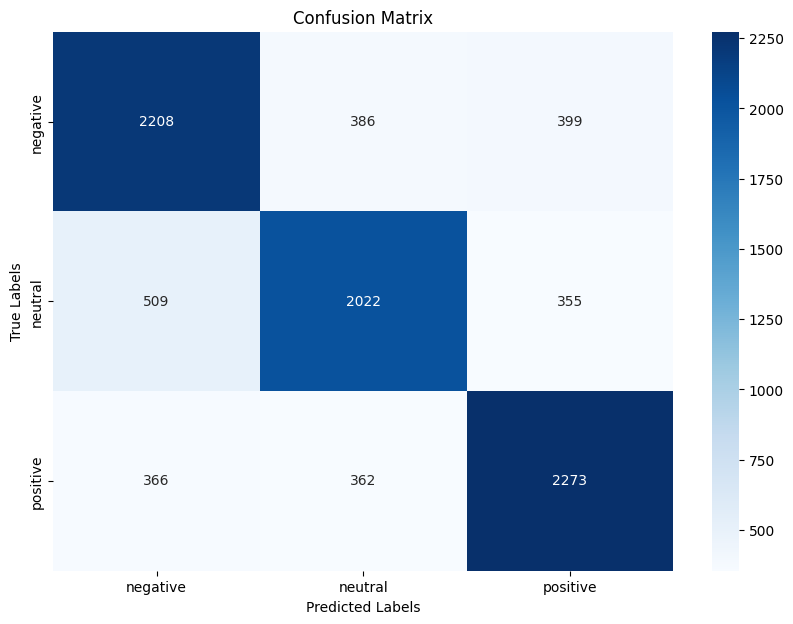

In [37]:
from transformers import Trainer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# Assuming you have a trained `trainer` object and `test_dataset`

# 1. Get predictions from the model
predictions = trainer.predict(test_dataset)

# 2. Extract logits and convert to predicted labels
logits = predictions.predictions
predicted_labels = np.argmax(logits, axis=1)

# 3. Get true labels from the dataset
true_labels = test_dataset.labels

# Convert tensors to numpy arrays if necessary
if isinstance(true_labels, torch.Tensor):
    true_labels = true_labels.numpy()

# 4. Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 5. Print the classification report
target_names = ['negative', 'neutral', 'positive']
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print("Classification Report:")
print(report)

# 6. Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
